In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

class Layer:
    def __init__(self,W,b,f):
        self._W = W
        self._b = b
        self._f = f
    def input(self,x):
        return (np.dot(self._W, x) + self._b)
    def forward(self,x):
        return (self._f(np.dot(self._W,x) + self._b))
    
def sigmoid(u):
    return 1/(1+np.exp(-u))

def d_sigmoid(y):
    return y * (1 - y)

def ReLU(u):
    return u * (u > 0) 

def d_ReLU(y):
    return 1. * (y > 0)

def SE(T,z):
    return np.dot((T - z).T, T - z).flatten()[0]/2

def d_SE(t, y):
    return -(t - y)

def backpropagation(output_data, training_data, input_data, output_layer, input_layer, input_layer_forward_prop):
    delta_output = d_SE(training_data, output_data) * d_sigmoid(output_data)
    delta_input = np.dot(output_layer._W.T, delta_output) * d_sigmoid(input_layer_forward_prop)

    d_W_output = np.dot(delta_output, input_layer_forward_prop.T)
    output_layer._W -= epsilon * d_W_output
    output_layer._b -= epsilon * delta_output

    d_W_input = np.dot(delta_input, input_data.T)
    input_layer._W -= epsilon * d_W_input
    input_layer._b -= epsilon * delta_input

epsilon = 0.1

Training set has 40000 rows and 785 columns
Test set has 2001 rows and 785 columns
(40000, 785)


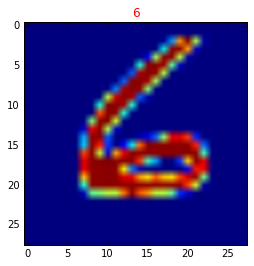

In [3]:
mnist_data = pd.read_csv("../input/train.csv")
mnist_shuffle = mnist_data.reindex(np.random.permutation(mnist_data.index)).reset_index(drop=True)
train = mnist_shuffle.ix[:39999]
test = mnist_shuffle.ix[39999:]

print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))
print (train.shape)

train_label = train.label
train_data = train.ix[: , 1: ]
test_label = test.label
test_data = test.ix[: , 1: ]

num = 200
image = np.array(train_data[num:num + 1]).reshape(28,28)
plt.imshow(image)
plt.title(train_label[num], color='red')

In [4]:
#encoder dimention
input_dim = 784
hidden1_dim = 100
hidden2_dim = 10
hidden3_dim = 2
hidden4_dim = 10
hidden5_dim = 100
output_dim = 784

W1 = np.random.randn(hidden1_dim, input_dim)
b1 = np.random.randn(hidden1_dim, 1)
L1 = Layer(W1, b1, sigmoid)

W2 = np.random.randn(hidden2_dim, hidden1_dim)
b2 = np.random.randn(hidden2_dim, 1)
L2 = Layer(W2, b2, sigmoid)

W3 = np.random.randn(hidden3_dim, hidden2_dim)
b3 = np.random.randn(hidden3_dim, 1)
L3 = Layer(W3, b3, sigmoid)

W4 = np.random.randn(hidden4_dim, hidden3_dim)
b4 = np.random.randn(hidden4_dim, 1)
L4 = Layer(W4, b4, sigmoid)

W5 = np.random.randn(hidden5_dim, hidden4_dim)
b5 = np.random.randn(hidden5_dim, 1)
L5 = Layer(W5, b5, sigmoid)

W6 = np.random.randn(output_dim, hidden5_dim)
b6 = np.random.randn(output_dim, 1)
L6 = Layer(W6, b6, sigmoid)


In [ ]:
history_train_SE = []
history_test_SE = []
train_error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[:, 1:]
train_data = np.float32(train_data)/255
test_input = test_data
test_input = test_input/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[:, 1:]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration:iteration + 1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y6 = L6.forward(Y1)
        train_error += SE(t, Y6)
        #back propagation
        backpropagation(Y6, t, X, L6, L1, Y1)
        
    Y1 = L1.forward(test_input.T)
    Y6 = L6.forward(Y1)
    test_error = SE(test_input.T, Y6)
    history_test_SE.append(test_error)
    
    train_error = train_error/train_len
    history_train_SE.append(train_error)
    print("train_error:%s, test_error:%s"%(train_error, test_error))
    train_error = 0
    
    
plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

In [ ]:
history_train_SE = []
history_test_SE = []
train_error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y5 = L5.forward(Y2)
        train_error += SE(Y1, Y5)
        #back propagation
        backpropagation(Y5, Y1, Y1, L5, L2, Y2)

    Y1 = L1.forward(test_input.T)
    Y2 = L2.forward(Y1)
    Y5 = L5.forward(Y2)
    
    test_error = SE(Y1, Y5)
    history_test_SE.append(test_error)
    
    train_error = train_error/train_len
    history_train_SE.append(train_error)
    print("train_error:%s, test_error:%s"%(train_error, test_error))
    train_error = 0
    
    
plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

In [ ]:
history_train_SE = []
history_test_SE = []
train_error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y3 = L3.forward(Y2)
        Y4 = L4.forward(Y3)
        train_error += SE(Y2, Y4)
        #backpropagation(Y6, t, X, L6, L1, Y1)
        #backpropagation(Y5, Y1, Y1, L5, L2, Y2)
        backpropagation(Y4, Y2, Y2, L4, L3, Y3)
        
    Y1 = L1.forward(X)
    Y2 = L2.forward(Y1)
    Y3 = L3.forward(Y2)
    Y4 = L4.forward(Y3)
    
    test_error = SE(Y2, Y4)
    history_test_SE.append(test_error)
    
    train_error = train_error/train_len
    history_train_SE.append(train_error)
    print("train_error:%s, test_error:%s"%(train_error, test_error))
    train_error = 0
    
plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

In [ ]:
i = 32

length = 40
random = np.int(np.random.rand() * length)
X = train_data[random: random+1].reshape(784, 1)

Y1 = L1.forward(X)
Y2 = L2.forward(Y1)
Y3 = L3.forward(Y2)
Y4 = L4.forward(Y3)
Y5 = L5.forward(Y4)
Y6 = L6.forward(Y5)
output_image = Y6.reshape(28,28)
plt.imshow(output_image)


In [ ]:
input_image = train_data[random: random+1].reshape(28, 28)
plt.imshow(input_image)